# Separating Classes with Dividing Lines

## Line Separation

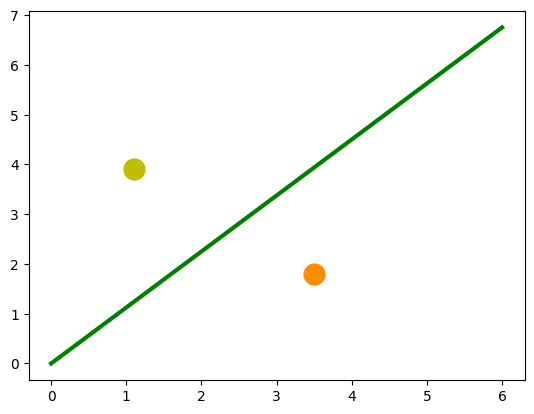

In [63]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)

fig, ax = plt.subplots()

ax.plot(3.5, 1.8, 'o',
        color = 'darkorange',
        markersize=15)
ax.plot(1.1, 3.9, 'oy',
        markersize=15)

point_on_line = (4, 4.5)

m = point_on_line[1] / point_on_line[0]

ax.plot(X, m * X, 'g-', linewidth = 3)

plt.show()

In [64]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

print(orange[0] * m - orange[1])

print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


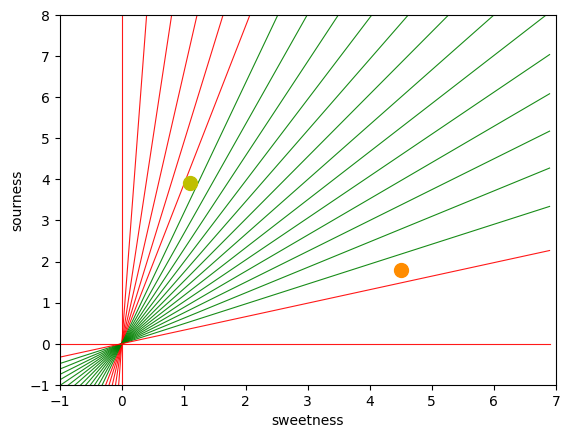

In [65]:
def create_distance_function(a, b, c):

    def distance(x, y):
        nom = a * x + b * y + c

        if nom == 0:
            pos = 0
        elif (nom < 0 and b < 0) or (nom > 0 and b > 0):
            pos = -1
        else:
            pos = 1

        return (np.absolute(nom) / np.sqrt(a**2 + b**2), pos)
    return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel('sweetness')
ax.set_ylabel('sourness')

x_min, x_max = -1, 7
y_min, y_max = -1, 8

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

X = np.arange(x_min, x_max, 0.1)

step = 0.05

for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    
    Y = slope * X
    
    results = []

    for point in fruits_coords:
        results.append(dist4line1(*point))

    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, 'g-', linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, 'r-', linewidth=0.8, alpha=0.9)

size = 10

for (index, (x, y)) in enumerate(fruits_coords):
    if index==0:
        ax.plot(x, y, 'o',
                color='darkorange',
                markersize=size)
    else:
        ax.plot(x, y, 'oy',
                markersize=size)
        

plt.show()

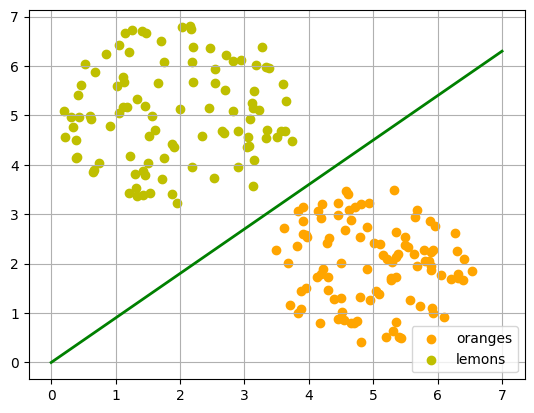

In [66]:
def points_within_circle(radius,
                         center=(0, 0),
                         number_of_points=100):
    
    center_x, center_y = center

    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi

    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)

    return x, y

X = np.arange(0, 8)

fig, ax = plt.subplots()

oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, oranges_y,
           c='orange', label='oranges')
ax.scatter(lemons_x, lemons_y,
           c='y', label='lemons')

ax.plot(X, 0.9 * X, 'g-', linewidth=2)

ax.legend()
ax.grid()
plt.show()

### Automatically Finding the Dividing Line

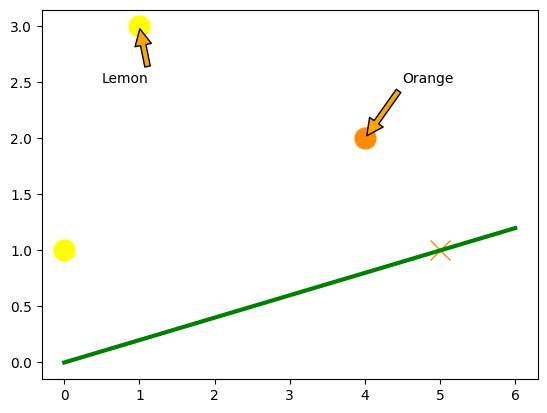

In [67]:
def plot_fruits(p1, p2, point_on_line=(5, 1)):
    X = np.arange(0, 7)

    fig, ax = plt.subplots()

    ax.plot(p1[0], p1[1], 'o', color='darkorange', markersize=15)  
    ax.annotate('Orange', xy=(p1[0], p1[1]),
                xytext=(p1[0]+0.5, p1[1]+0.5),
                arrowprops=dict(facecolor='orange', shrink=0.05))
    
    ax.plot((p2[0], p2[1]), 'o', color='yellow', markersize=15)
    ax.annotate('Lemon', xy=(p2[0], p2[1]),
                xytext=(p2[0]-0.5, p2[1]-0.5),
                arrowprops=dict(facecolor='orange', shrink=0.05))
    
    ax.plot(*point_on_line, 'x', color='darkorange', markersize=15)

    m = point_on_line[1] / point_on_line[0]

    ax.plot(X, m * X, 'g-', linewidth=3)

    plt.show()


orange = (4, 2)
lemon = (1, 3)
point = (5, 1)

plot_fruits(p1=orange, p2=lemon, point_on_line=point)

# Why the hell is there an additional yellow dot? I have no idea

In [68]:
m = point[1] / point[0]
m * orange[0] - orange[1]

-1.2

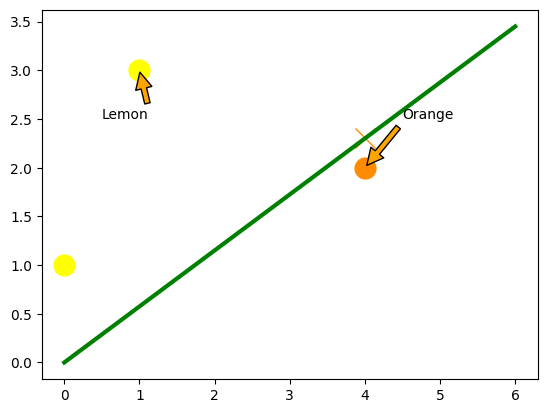

In [69]:
delta = 0.3

plot_fruits(p1=(4, 2), p2=(1, 3), point_on_line=(4, 2+delta))

In [70]:
new_slope = (2+delta) / 4
new_slope * orange[0] - orange[1]

0.2999999999999998

In [71]:
targeted_slope = new_slope
inital_slope = point[1] / point[0]
error = targeted_slope - inital_slope

inital_slope + error

0.575

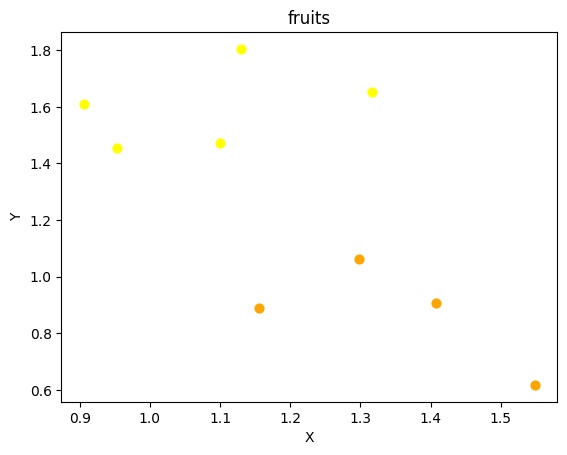

In [72]:
from sklearn.datasets import make_blobs

number_of_samples = 9
centers = [(1, 1.5), (1.5, 1)]

data, labels = make_blobs(n_samples=number_of_samples,
                          cluster_std=0.2,
                          centers=np.array(centers),
                          random_state=42)

fruits = [(data[i], labels[i]) for i in range(len(data))]

fig, ax = plt.subplots()
colors = ['yellow', 'orange']
label_name = ['Lemons', 'Oranges']

for label in range(0, 2):
    ax.scatter(data[labels==label, 0],
               data[labels==label, 1],
               c=colors[label], s=40,
               label=label_name[label])
    
ax.set(xlabel='X', ylabel='Y', title='fruits');

Adaptive line finder

0.3 0.41544252971893364
0.7154425297189336 1.4073164614375075 0.9068540492859486
0.7154425297189336 0.1808263111956887
0.8962688409146223 1.2974337759331152 1.0628494665190549
The final value for the slope: 0.8962688409146223


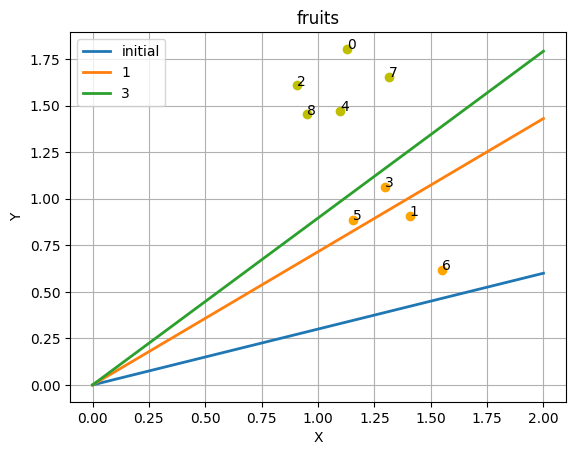

In [73]:
slope = 0.3

def adjust(slope=0.3):
    line = None
    delta = 0.1
    counter = -1

    for((x, y), label) in zip(data, labels):
        counter += 1
        ax.scatter(x, y, color='y' if label==0 else 'orange')
        ax.annotate(str(counter), (x, y))

        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope)

        if label == 1 and pos2line < 0:
            print(slope, error)

            slope += error
            print(slope, x, y)

            ax.plot(X, slope * X, linewidth=2, label=str(counter))
        elif label == 0 and pos2line > 0:
            print(slope, error) 

            slope -= error
            print(slope, x, y)

            ax.plot(X, slope * X, linewidth=2, label=str(counter))

    return slope

X = np.arange(0, 3)

fig, ax = plt.subplots()

colors = ['orange', 'yellow']
label_name = ['Oranges', 'Lemons']

ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1

ax.plot(X, slope * X, linewidth=2, label='initial')
slope = adjust(slope)

ax.legend()
ax.grid()

print(f'The final value for the slope: {slope}')

plt.show()

In [74]:
data = np.concatenate((data, np.array([[1.1, 1.6]])))
labels = np.concatenate((labels, np.array([1])))

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'fruits')]

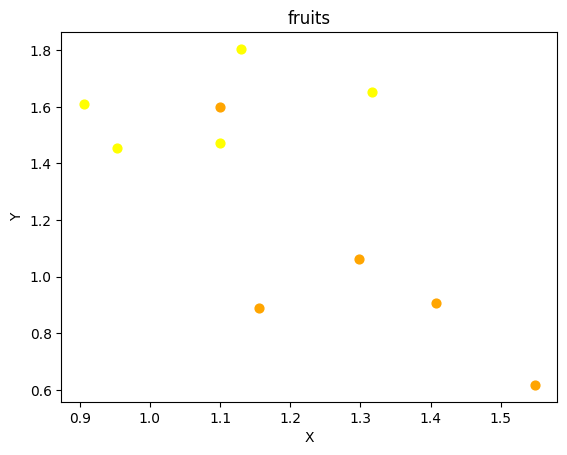

In [75]:
fig, ax = plt.subplots()

colors = ['yellow', 'orange']
label_name = ['Lemons', 'Oranges']

for label in range(0, 2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1],
               c=colors[label], s=40, label=label_name[label])
    
ax.set(xlabel='X', ylabel='Y', title='fruits')

How an outlier can mess everything up

0.3 0.41544252971893364
0.7154425297189336 0.1808263111956887
0.8962688409146223 0.6491857045399231
The final value for the slope: 1.5454545454545454


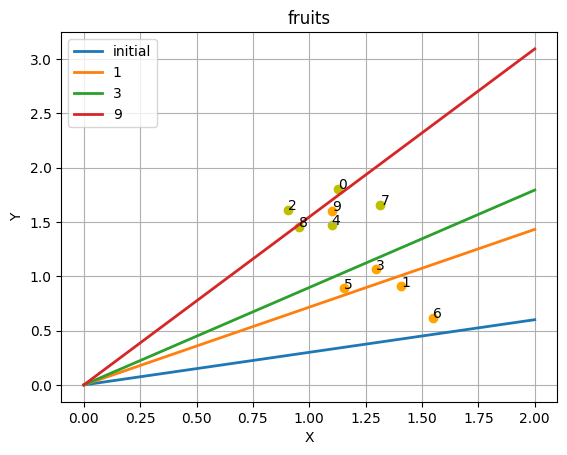

In [76]:
start_slope = 0.3

def adjust(slope=0.3):
    line = None
    delta = 0.1
    counter = -1

    for ((x, y), label) in zip(data, labels):
        counter += 1

        ax.scatter(x, y, color='y' if label==0 else 'orange')
        ax.annotate(str(counter), (x, y))

        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope)

        if label==1 and pos2line < 0:
            print(slope, error)

            slope += error

            ax.plot(X, slope * X, linewidth=2, label=str(counter))
        elif label==0 and pos2line > 0:
            print(slope, error)

            slope -= error

            ax.plot(X, slope * X, linewidth=2, label=str(counter))

    return slope

fig, ax = plt.subplots()
colors = ['orange', 'yellow']
label_name = ['Oranges', 'Lemons']

ax.set(xlabel='X', ylabel='Y', title='fruits')

slope_count = 1

ax.plot(X, start_slope * X, linewidth=2, label='initial')

slope = adjust(start_slope)

ax.legend()
ax.grid()

print(f'The final value for the slope: {slope}')

plt.show()

Inclusion of a `learning_rate`

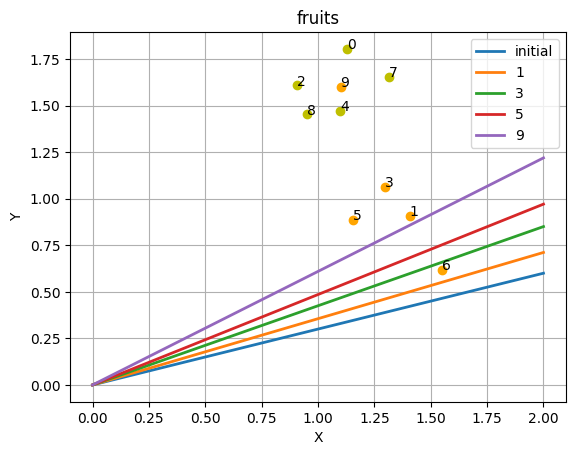

0.609691601006235


In [77]:
learning_rate, start_slope = 0.1, 0.3

def adjust(slope=0.3, learning_rate=0.3):
    line = None
    delta = 0.3
    counter = -1

    for((x, y), label) in zip(data, labels):
        counter += 1

        ax.scatter(x, y, color='y' if label==0 else 'orange')
        ax.annotate(str(counter), (x, y))

        pos2line = slope * x - y 
        target_slope = (y + delta) / x
        error = (target_slope - slope)

        if label==1 and pos2line < 0:
            slope += error * learning_rate

            ax.plot(X, slope * X, linewidth=2, label=str(counter))
        elif label==0 and pos2line > 0:
            slope -= error * learning_rate

            ax.plot(X, slope * X, linewidth=2, label=str(counter))

    return slope
    
fig, ax = plt.subplots()
colors = ['orange', 'yellow']
label_name = ['Orange', 'Lemons']

ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1

ax.plot(X, start_slope * X, linewidth=2, label='initial')
slope = adjust(start_slope, learning_rate)

ax.legend()
ax.grid()

plt.show()

print(slope)

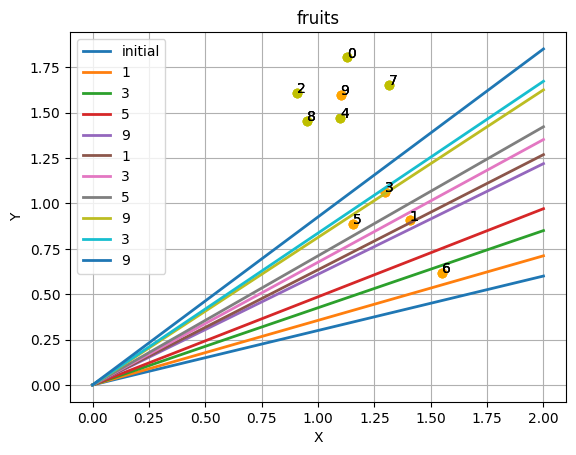

0.9256980198268796


In [78]:
fig, ax = plt.subplots()

ax.set(xlabel='X', ylabel='Y', title='fruits')

slope_count = 1

ax.plot(X, start_slope * X, linewidth=2, label='initial')

slope = adjust(start_slope, learning_rate)

slope = adjust(slope, learning_rate)
slope = adjust(slope, learning_rate)

ax.legend()
ax.grid()

plt.show()

print(slope)

## A simple Neural Network

In [79]:
class Perception:
    def __init__(self, weights):
        self.weights = np.array(weights)

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()

        return weighted_sum

In [80]:
p = Perception(weights=[-0.45, 0.5])
p([2.9, 4])

0.6950000000000001

In [81]:
print('oranges')
for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=', ')
    print()

print('lemons')
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=', ')
    print()    

oranges
-0.7175023966386944, 
-0.8815833911513897, 
-1.0883705692106704, 
-2.174548084752951, 
-0.32674670686793705, 
-1.0464730812650498, 
-0.4847223024026148, 
-1.5419545882894508, 
-1.2092879508496737, 
-1.3218916077921636, 
lemons
1.9808055729213756, 
1.2059802066626517, 
1.0382058498848128, 
1.891502390324258, 
2.2849013714870035, 
2.738686703327056, 
1.6356406283281917, 
1.845091687534659, 
2.521283447315459, 
0.7034463105485644, 


In [82]:
from collections import Counter

evaluation = Counter()

for point in zip(oranges_x, oranges_y):
    res = p(point)

    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

for point in zip(lemons_x, lemons_y):
    res = p(point)

    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)    

Counter({'corrects': 200})


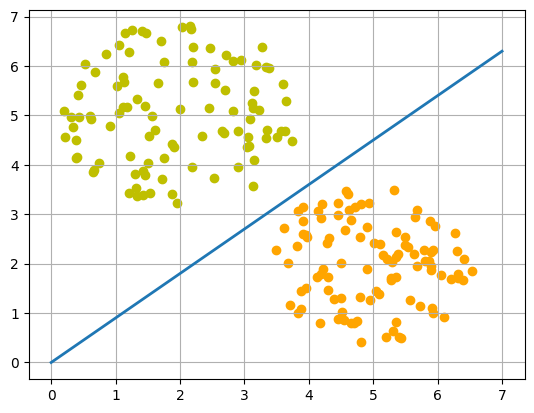

In [83]:
import time

slope = 0.1

X = np.arange(0, 8)

fig, ax = plt.subplots()

ax.scatter(oranges_x, oranges_y, c='orange', label='oranges')
ax.scatter(lemons_x, lemons_y, c='y', label='lemons')

slope = 0.45 / 0.5

ax.plot(X, slope * X, linewidth=2)

ax.grid()
plt.show()

### Training a Neural Network

In [84]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

labelled_data = list(zip(oranges + lemons, [0] * len(oranges) + [1] * len(lemons)))

random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                                                                    train_size=0.8,
                                                                    test_size=0.2,
                                                                    random_state=42)

print(train_data[:10], test_data[:10])

[(4.201516803148143, 3.2095546295847095), (5.089280853625478, 1.384936775638273), (5.902491498907383, 1.8677754271456783), (4.909725966802775, 2.7334417927659245), (4.139654415124958, 3.073699489897376), (3.229796218373391, 5.115705388840092), (3.5698705983644308, 4.680258156089199), (5.147268698340813, 2.180019059036408), (6.415605806873874, 2.0861835543326657), (5.678207454517163, 3.0792229764006263)] [(3.152223127055914, 4.094503563727854), (4.129757121073925, 1.7292937621806328), (5.212580980238948, 2.096142709566304), (3.3350395205873937, 4.547362528484726), (4.811417453073319, 3.21048922110389), (3.732999128331847, 4.477444776970958), (0.21621179560364445, 4.553199587531001), (0.43875056917070565, 4.964678255227642), (1.564128293801676, 4.981871187725653), (2.1494216554094914, 6.799796548657015)]


### Adding Weight Adaptation

In [85]:
class Perceptron:
    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()

        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, target_result, calculated_result, in_data):
        if type(in_data) != np.ndarray:
            in_data =np.array(in_data)

        error = target_result - calculated_result

        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()

        for index in range(len(data)):
            label = int(round(p(data[index]), 0))

            if label == labels[index]:
                evaluation['correct'] += 1
            else:
                evaluation['wrong'] += 1

        return evaluation
    
p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], p(train_data[index]), train_data[index])

evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())

evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.3680763   1.27325618]


100
100


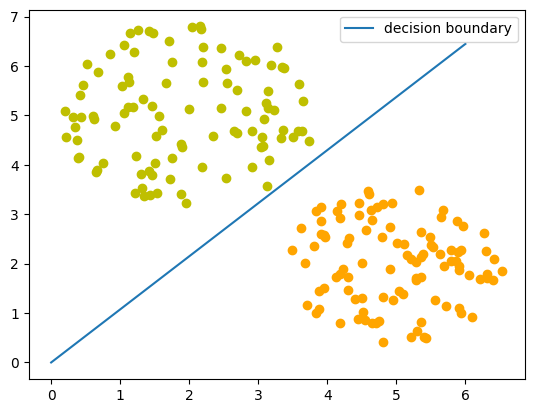

[-1.3680763   1.27325618]


In [86]:
X = np.arange(0, 7)

fig, ax = plt.subplots()

print(len(lemons_x))
print(len(lemons_y))

ax.scatter(oranges_x, oranges_y, c='orange')
ax.scatter(lemons_x, lemons_y, c='y')

w1 = p.weights[0]
w2 = p.weights[1]

m = -w1 / w2

ax.plot(X, m * X, label='decision boundary')
ax.legend()

plt.show()

print(p.weights)

0 -1.4489421353432999 [-0.32015168 -0.22095546] (4.201516803148143, 3.2095546295847095)
5 -0.00973088375927657 [0.00282794 0.29061508] (3.229796218373391, 5.115705388840092)
7 7.049670578452744 [-0.51189893  0.07261317] (5.147268698340813, 2.180019059036408)
10 0.7928534832038958 [-0.38935877  0.49108539] (1.225401626208345, 4.184722246178987)
75 4.1712616682514785 [-0.77277904  0.18526266] (3.834202748306164, 3.0582273264878403)
77 0.6831855759846828 [-0.50331755  0.73672157] (2.694614932143194, 5.514589038611096)
104 2.4690850059837737 [-0.96165669  0.38947897] (4.583391405690924, 3.472425946763388)
107 0.9293794177991174 [-0.77368643  0.8324764 ] (1.8797025502077624, 4.429974297838147)


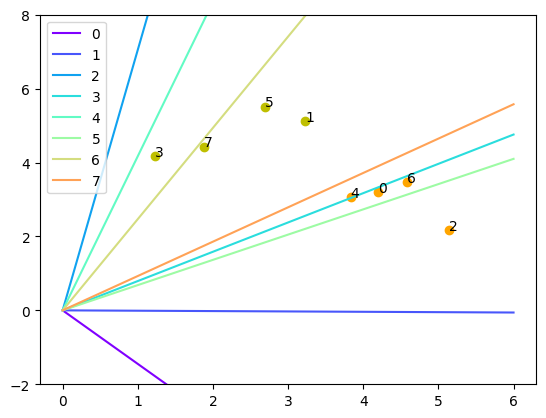

In [91]:
import matplotlib.cm as cm


p = Perceptron(weights=[0.1, 0.1], learning_rate=0.1)

number_of_colors = 10
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0

for index in range(len(train_data)):
    old_weights = p.weights.copy()

    p.adjust(train_labels[index], p(train_data[index]), train_data[index])

    if not np.array_equal(old_weights, p.weights):
        color = 'orange' if train_labels[index] == 0 else 'y'

        ax.scatter(train_data[index][0], train_data[index][1], color=color)
        ax.annotate(str(counter), (train_data[index][0], train_data[index][1]))

        m = -p.weights[0] / p.weights[1]

        print(index, m, p.weights, train_data[index])

        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1

ax.legend()
plt.show()